#### 2. Tackle Noise with Error Correction


C:\Users\jayda\AppData\Local\Temp\ipykernel_6044\2208608654.py:22: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  counts = simulator.run(qobj).result().get_counts()


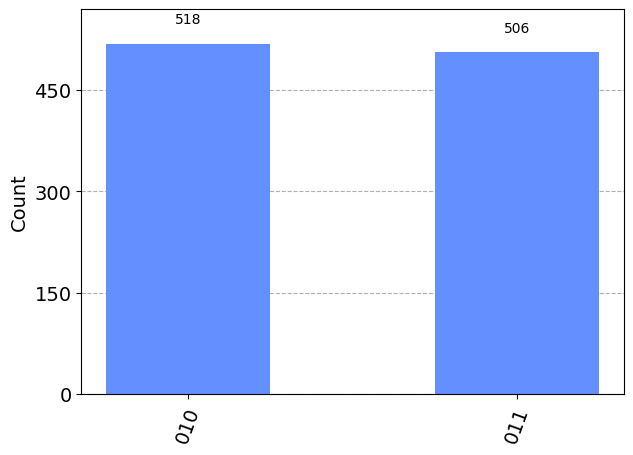

In [3]:
from qiskit import QuantumCircuit, Aer, transpile, assemble
from qiskit.visualization import plot_histogram

# Simplified bit-flip error correction circuit
def bit_flip_code():
    qc = QuantumCircuit(3, 3)
    qc.h(0)  # Prepare superposition state
    qc.cx(0, 1)  # Entangle
    qc.cx(0, 2)  # Entangle
    qc.x(1)  # Introduce error
    qc.cx(0, 1)  # Error correction
    qc.cx(0, 2)  # Error correction
    qc.ccx(2, 1, 0)  # Error correction
    qc.measure(range(3), range(3))  # Measure
    return qc

# Run the circuit and plot the results
circuit = bit_flip_code()
simulator = Aer.get_backend('qasm_simulator')
transpiled_circuit = transpile(circuit, simulator)
qobj = assemble(transpiled_circuit)
counts = simulator.run(qobj).result().get_counts()
plot_histogram(counts)  # Outputs the histogram plot
